<a href="https://colab.research.google.com/github/OktaPitriani/Proyek/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Okta Pitriani
- **Email:** pidi.baiq29@gmail.com
- **ID Dicoding:** okta_fitriani29

## Menentukan Pertanyaan Bisnis

- What are the differences in bike rental patterns on weekdays and weekends?
- How does weather affect a person’s decision to use a bike?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv ('bike-sharing-data/hour.csv')

In [ ]:
df = pd.read_csv ('bike-sharing-data/day.csv')

In [ ]:
hour_df = pd.read_csv('bike-sharing-data/hour.csv')

**Insight:**
- Struktur Data Penting dalam Penggabungan
- Pentingnya Normalisasi Data

### Assessing Data

In [ ]:
print(df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [ ]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [ ]:
print(df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:**
- Kolom dteday masih berupa tipe object -> di ubah jadi datetime
- Pentingnya memahami Struktur Data secara Menyeluruh

### Cleaning Data

Menghapus jika ada missing value

In [ ]:
hour_df.dropna(inplace=True)

Normalisasi Kolom

In [ ]:
hour_df['temp'] = hour_df['temp'] * 41
hour_df['atemp'] = hour_df['atemp'] * 50
hour_df['hum'] = hour_df['hum'] * 100
hour_df['windspeed'] = hour_df['windspeed'] * 67

Mengubah karakteristik menjadi deskriptif

In [ ]:
hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain',
    4: 'Heavy Rain'
})

**Insight:**
- Menghapus missing values (nilai yang hilang) adalah langkah awal yang penting untuk memastikan integritas dataset.
- Normalisasi kolom (seperti temp, atemp, hum, dan windspeed) bertujuan untuk mengubah data terstandarisasi menjadi nilai yang lebih dapat dimengerti dan digunakan dalam analisis.
- Mengubah nilai numerik dalam kolom kategori (seperti season dan weathersit) menjadi label deskriptif memudahkan pemahaman data dan menjelaskan hasil analisis.

## Exploratory Data Analysis (EDA)

### Explore ...

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


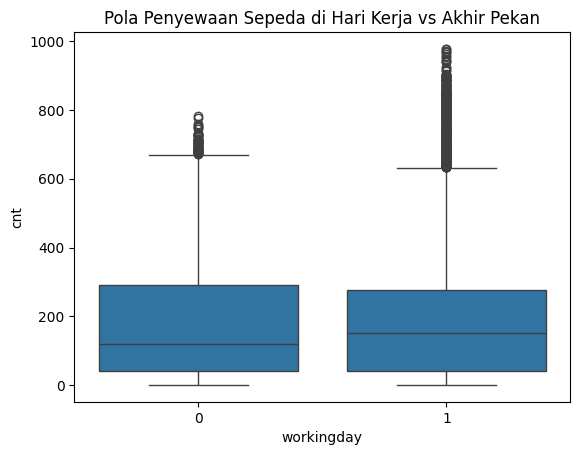

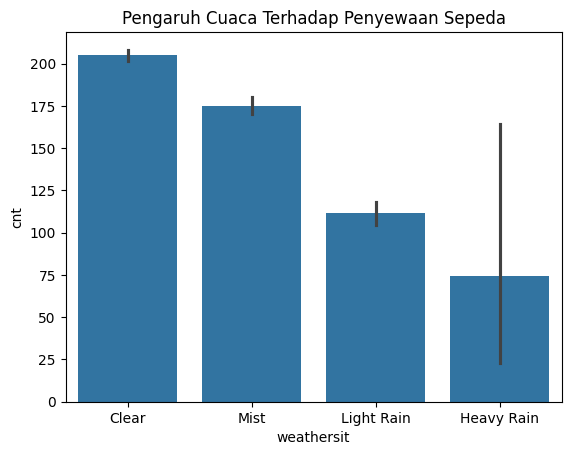

In [ ]:
sns.boxplot(x='workingday', y='cnt', data=hour_df)
plt.title('Pola Penyewaan Sepeda di Hari Kerja vs Akhir Pekan')
plt.show()

sns.barplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Pengaruh Cuaca Terhadap Penyewaan Sepeda')
plt.show()

**Insight:**

Berdasarkan diagram di atas.

- Pola Penyewaan: Penggunaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Ini bisa dipengaruhi oleh faktor seperti penggunaan sepeda untuk transportasi ke tempat kerja.

- Pengaruh Cuaca: Cuaca berperan penting dalam keputusan orang untuk menyewa sepeda. Cuaca cerah mendorong lebih banyak penyewaan, sementara cuaca buruk seperti hujan mengurangi minat untuk menyewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


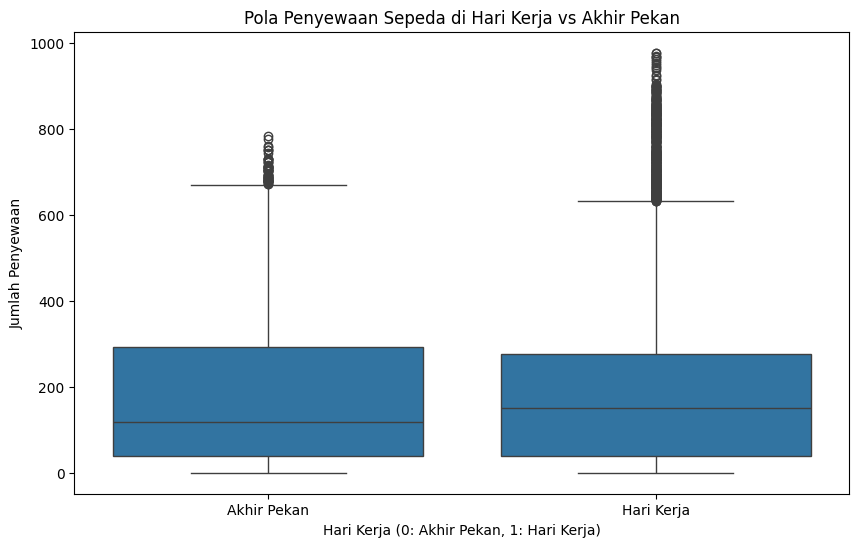

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=hour_df)
plt.title('Pola Penyewaan Sepeda di Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari Kerja (0: Akhir Pekan, 1: Hari Kerja)')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan', 'Hari Kerja'])
plt.show()


### Pertanyaan 2:

<ipython-input-30-495ad758c4eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=avg_rentals_by_weather, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

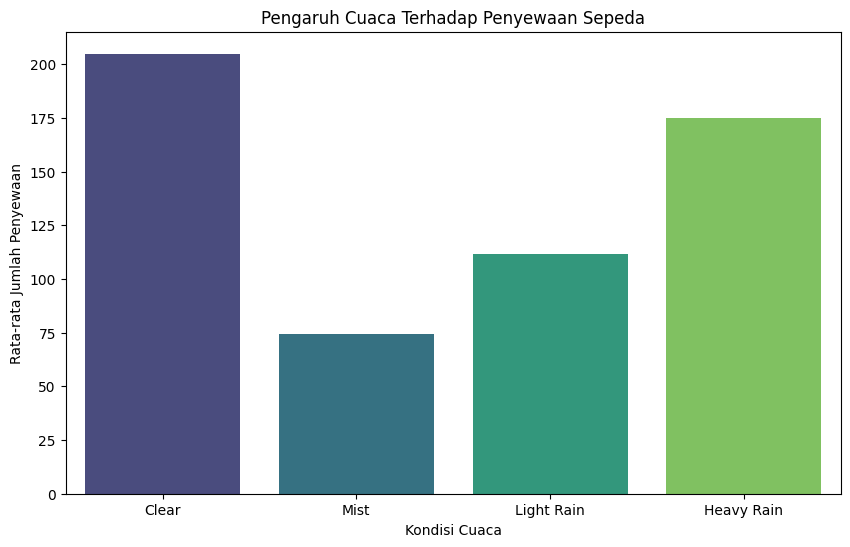

In [ ]:
plt.figure(figsize=(10, 6))
avg_rentals_by_weather = hour_df.groupby('weathersit')['cnt'].mean().reset_index()
sns.barplot(x='weathersit', y='cnt', data=avg_rentals_by_weather, palette='viridis')
plt.title('Pengaruh Cuaca Terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.show()


## Conclusion

- Penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan.
- Cuaca berpengaruh signifikan terhadap jumlah penyewaan sepeda, dengan lebih banyak penyewaan terjadi pada hari yang cerah.